In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

sns.set(style='whitegrid')
sns.set_palette('pastel')
warnings.filterwarnings('ignore')

# 데이터 분석

In [2]:
df = pd.read_csv("/content/drive/MyDrive/machine_learning_data/Electric_Vehicle_Population_Data.csv")
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,3C3CFFGE4E,Yakima,Yakima,WA,98902.0,2014,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,87,0,14.0,1593721,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10
1,5YJXCBE40H,Thurston,Olympia,WA,98513.0,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,2.0,257167501,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
2,3MW39FS03P,King,Renton,WA,98058.0,2023,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,11.0,224071816,POINT (-122.1298876 47.4451257),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,7PDSGABA8P,Snohomish,Bothell,WA,98012.0,2023,RIVIAN,R1S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,21.0,260084653,POINT (-122.1873 47.820245),PUGET SOUND ENERGY INC,5.306105e+10
4,5YJ3E1EB8L,King,Kent,WA,98031.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,33.0,253771913,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [3]:
df.shape
# (166800, 17)

(166800, 17)

In [4]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,166795.000000,166800.000000,166800.000000,166800.000000,166440.000000,1.668000e+05,1.667950e+05
mean,98173.713750,2020.341793,61.508993,1152.723171,29.178941,2.172420e+08,5.297709e+10
std,2442.584415,3.001465,93.271747,8661.081091,14.853534,7.727458e+07,1.569754e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.790741e+08,5.303301e+10
50%,98122.000000,2021.000000,0.000000,0.000000,33.000000,2.244045e+08,5.303303e+10
75%,98371.000000,2023.000000,84.000000,0.000000,42.000000,2.513421e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [5]:
# 결측치 확인
df.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 360
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [6]:
# 중복 row 확인
df.duplicated().sum()

0

In [7]:
# Electric Range가 충분히 조사되지 않음
range_val = df['Electric Range'].value_counts()
range_df = pd.DataFrame({'Electric Range':range_val.index, 'Count':range_val.values})
range_df

,Electric Range,Count
0,0,83517
1,215,6272
2,220,4103
3,25,3918
4,84,3918
...,...,...
97,95,3
98,11,3
99,51,3
100,74,3


In [8]:
# 권장 소매 가격(> 0)
df[df['Base MSRP'] != 0]['Base MSRP'].describe()

count      3363.000000
mean      57173.424026
std       22756.095376
min       31950.000000
25%       39995.000000
50%       59900.000000
75%       69900.000000
max      845000.000000
Name: Base MSRP, dtype: float64

In [9]:
# 권장 소매 가격의 데이터가 충분하지 않아 제외
df[df['Base MSRP'] != 0]['Base MSRP'].count()

3363

## 판매량 Top 3 제조사를 찾아서 electric vehicle type과 eletric range 분석

In [10]:
# 생산 연도, 제조사, 모델명, 전기차 종류, 순수 전기 주행 거리
col_list = ['Model Year', 'Make', 'Model', 'Electric Vehicle Type', 'Electric Range']
new_df = df[col_list]
new_df

,Model Year,Make,Model,Electric Vehicle Type,Electric Range
0,2014,FIAT,500,Battery Electric Vehicle (BEV),87
1,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),200
2,2023,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),20
3,2023,RIVIAN,R1S,Battery Electric Vehicle (BEV),0
4,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),322
...,...,...,...,...,...
166795,2013,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),19
166796,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),0
166797,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),0
166798,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),38


### 생산 연도별 차량 판매 추이

In [11]:
# 제조사 별 판매량
val1 = new_df['Make'].value_counts()
make_df = pd.DataFrame({'Make':val1.index, 'Count':val1.values})
make_df

,Make,Count
0,TESLA,74834
1,NISSAN,13848
2,CHEVROLET,13072
3,FORD,8577
4,BMW,7196
5,KIA,6995
6,TOYOTA,5812
7,VOLKSWAGEN,4717
8,JEEP,4100
9,HYUNDAI,4057


In [12]:
# 상위 3개의 제조사(테슬라, 닛산, 쉐보레) 비중
make_cnt = make_df['Count']
top3_cnt = make_cnt[:3].sum()
total_cnt = make_df['Count'].sum()
top3_ratio = (top3_cnt / total_cnt) * 100
print(top3_ratio)

61.00359712230215


In [13]:
# 각 모델들의 판매량
val2 = new_df['Model'].value_counts()
model_df = pd.DataFrame({'Model':val2.index, 'Count':val2.values})
model_df.head(10)

,Model,Count
0,MODEL Y,32822
1,MODEL 3,28926
2,LEAF,13274
3,MODEL S,7611
4,BOLT EV,6413
5,MODEL X,5429
6,VOLT,4825
7,ID.4,3647
8,WRANGLER,3161
9,MUSTANG MACH-E,3107


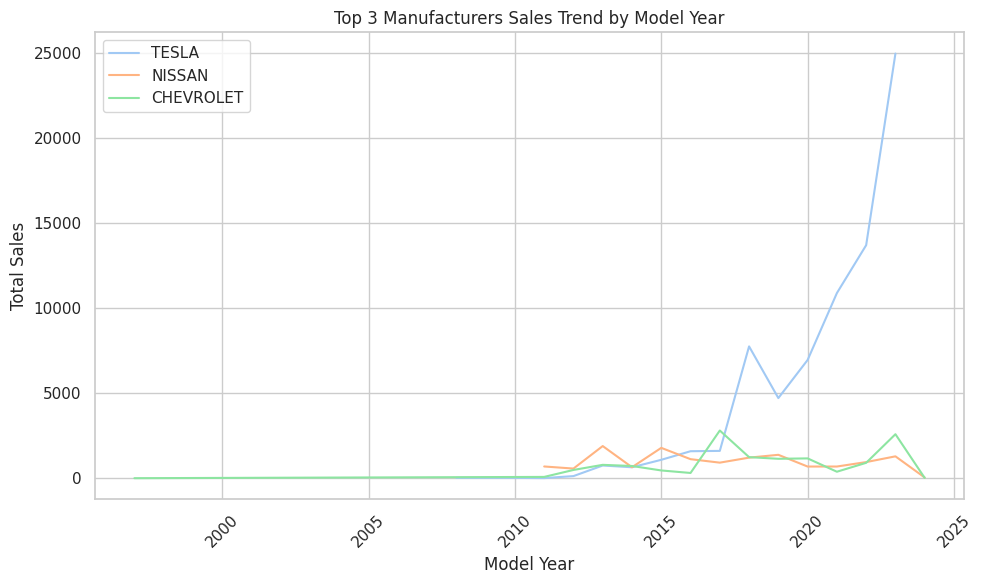

In [14]:
top3_list = ['TESLA', 'NISSAN', 'CHEVROLET']

# 생산 연도에 따른 상위 3개 제조사의 판매 대수 추이를 저장할 딕셔너리
sales_data = {make: [] for make in top3_list}

# 생산 연도별 판매 대수 데이터 수집
for make in top3_list:
    grouped = new_df[new_df['Make'] == make].groupby('Model Year')
    for year, group in grouped:
        total_sales = group.shape[0]
        sales_data[make].append((year, total_sales))



# 시각화: 선 그래프
plt.figure(figsize=(10, 6))

for make in top3_list:
    years, counts = zip(*sales_data[make])
    plt.plot(years, counts, label=make)

plt.title('Top 3 Manufacturers Sales Trend by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Total Sales')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()  # 그래프의 서브 플롯들이 서로 겹치지지 않도록 자동 조정
plt.show()

## Electric Vehicle Type, Electric Range 분석

### Electric Vehicle Type(%) : HEV(0), PHEV(22), BEV(78)

In [15]:
# Type 빈도 확인
type_val = new_df['Electric Vehicle Type'].value_counts()
type_df = pd.DataFrame({'Electric Vehicle Type':type_val.index, 'Count':type_val.values})
type_df

,Electric Vehicle Type,Count
0,Battery Electric Vehicle (BEV),130293
1,Plug-in Hybrid Electric Vehicle (PHEV),36507


In [16]:
# 비율 확인
t = type_df['Count']
bev_cnt = t[0]
phev_cnt = t[1]
bev_ratio = (bev_cnt / (bev_cnt + phev_cnt)) * 100
print(bev_ratio)

78.11330935251799


### 상위 3개 제조사 분석

In [17]:
# Electric Range != 0
top3_list = ['TESLA', 'NISSAN', 'CHEVROLET']

row111 = new_df[(new_df['Make'].isin(top3_list)) & (new_df['Electric Range'] != 0)]['Electric Range']
row111.describe()

count    45266.000000
mean       186.635886
std         83.102781
min         35.000000
25%         84.000000
50%        215.000000
75%        238.000000
max        337.000000
Name: Electric Range, dtype: float64

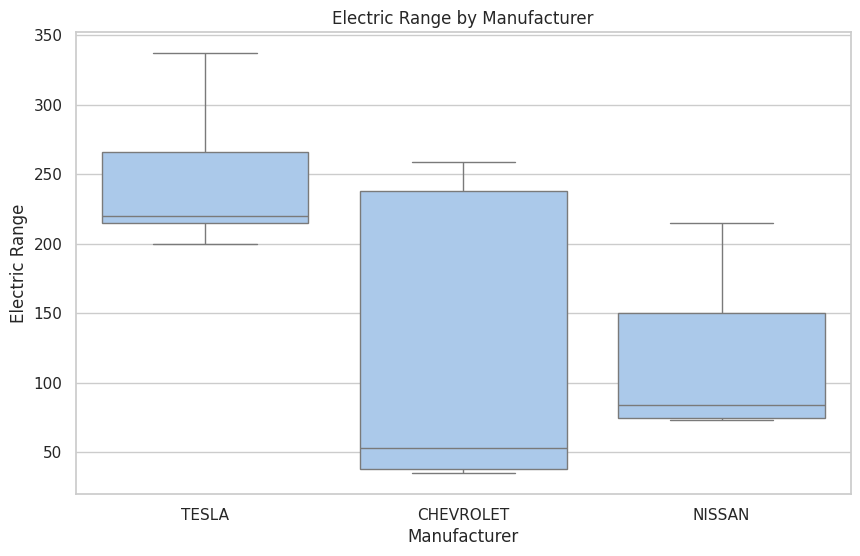

In [29]:
# Electric Range != 0
filtered_data = new_df[(new_df['Make'].isin(top3_list)) & (new_df['Electric Range'] != 0)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data, x='Make', y='Electric Range')
plt.title('Electric Range by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Electric Range')
plt.show()

### 그 외 제조사 분석

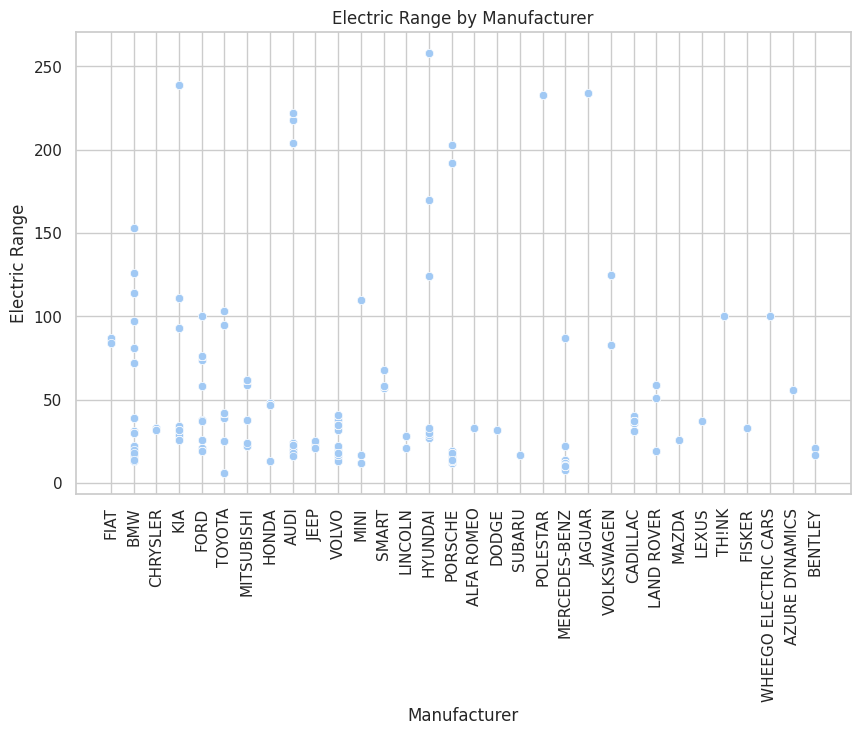

In [20]:
filtered_data = new_df[~new_df['Make'].isin(top3_list) & (new_df['Electric Range'] != 0)]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x='Make', y='Electric Range')
plt.title('Electric Range by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Electric Range')
plt.xticks(rotation=90)
plt.show()